In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

t_math1 = [40,30,20,45,63,69,25,31,12,14,100]
t_math2 = [11,13,14,21,22,25,10,9,12,7,100]

In [3]:
sp_df = pd.DataFrame({'scoring_1':t_math1,
                     'scoring_2':t_math2})

<Axes: ylabel='scoring_1'>

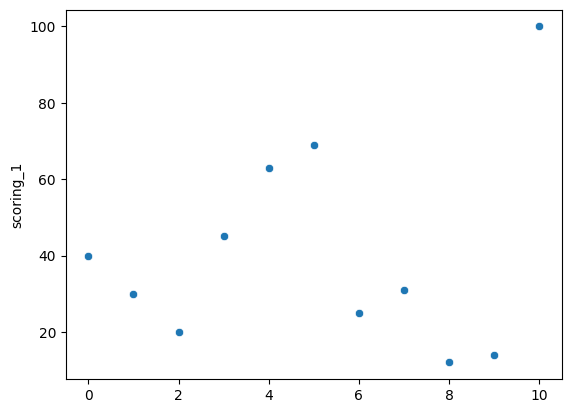

In [4]:
sns.scatterplot(sp_df.scoring_1)
# 충분히 이상치가 아닌 100점은 나올 수 있는 점수
# 그렇기 때문에 도메인의 특성을 잘 파악해서 어떤 값이 이상치가 될 수 있는 지에 대한 판단은 필요하다.

<Axes: ylabel='scoring_2'>

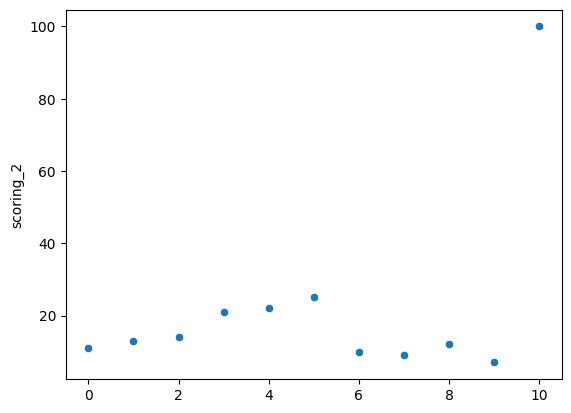

In [5]:
sns.scatterplot(sp_df.scoring_2)

### 예시 데이터를 가지고 Outlier를 확인하기!

In [6]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Boxplot -> 이상치를 시각화하는 기법으로, 바깥쪽에 위치한 점들이 이상치로 표현됨

<Axes: >

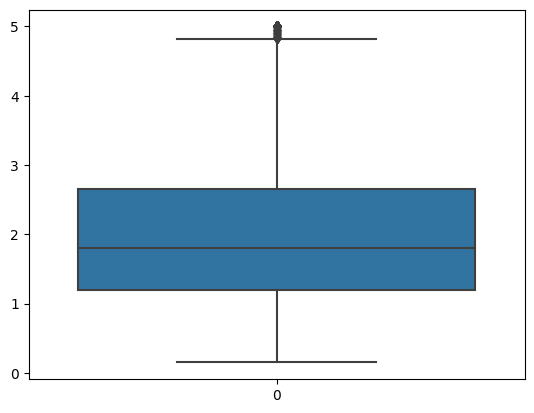

In [7]:

sns.boxplot(df.target)

<Axes: >

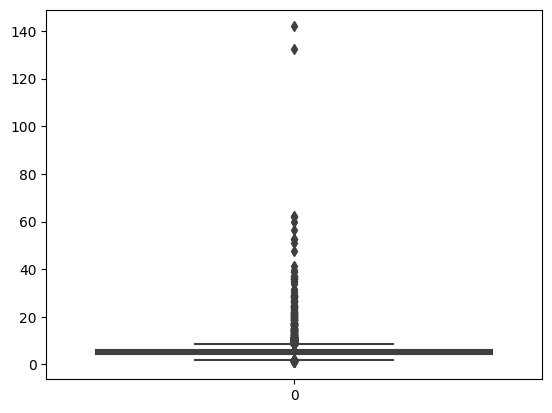

In [9]:

sns.boxplot(df.AveRooms)

<Axes: >

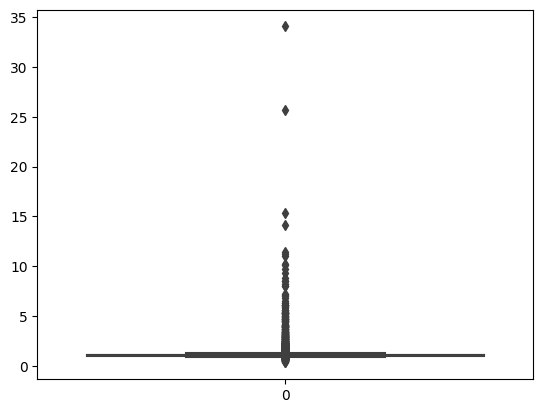

In [10]:
sns.boxplot(df.AveBedrms)

In [13]:
df.AveBedrms.describe()
#max값이 평균과 비교해 보았을 때 지나치게 높은 것을 알 수 있다. -> 이상치로 의심되는 것이 존재한다는 것을 알 수 있음.

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64

In [14]:
df.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [16]:
#최댓값 인덱스 추출.
np.argmax(df['AveBedrms'])

1979

In [17]:
df.iloc[1979]

MedInc          4.625000
HouseAge       34.000000
AveRooms      132.533333
AveBedrms      34.066667
Population     36.000000
AveOccup        2.400000
Latitude       38.800000
Longitude    -120.080000
target          1.625000
Name: 1979, dtype: float64

### 이상치를 꼭 제거하지 않고 회귀분석의 RMSE 정도를 낮출 순 없을까? -가중치나 이런 새로운 변수를 만들면 정말 성능이 더 좋아지는 것인가?

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [18]:
df_sp = df[['AveRooms','HouseAge','Population','AveBedrms','target']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

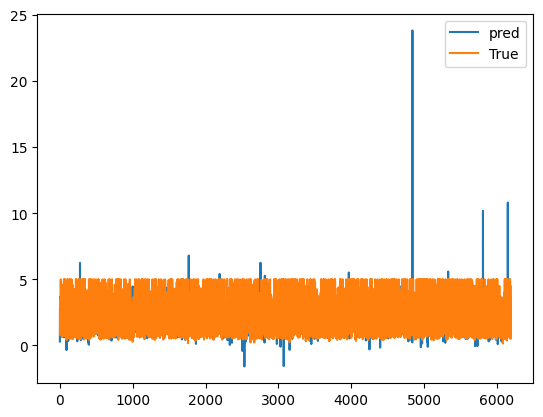

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

1.2705729000659036


- 베이스라인 모델로 회귀분석 진행 시 1.2

In [23]:
Q1 = df_sp['AveBedrms'].quantile(0.25)
Q3 = df_sp['AveBedrms'].quantile(0.75)
IQR = Q3-Q1
rev_range = 3
filter1 = (df_sp['AveBedrms'] >= Q1 - rev_range*IQR) & (df_sp['AveBedrms'] <=Q3 + rev_range*IQR)

In [24]:
df_sp_rmv = df_sp.loc[filter1]

In [25]:
df_sp_rmv

,AveRooms,HouseAge,Population,AveBedrms,target
0,6.984127,41.0,322.0,1.023810,4.526
1,6.238137,21.0,2401.0,0.971880,3.585
2,8.288136,52.0,496.0,1.073446,3.521
3,5.817352,52.0,558.0,1.073059,3.413
4,6.281853,52.0,565.0,1.081081,3.422
...,...,...,...,...,...
20635,5.045455,25.0,845.0,1.133333,0.781
20636,6.114035,18.0,356.0,1.315789,0.771
20637,5.205543,17.0,1007.0,1.120092,0.923
20638,5.329513,18.0,741.0,1.171920,0.847


In [26]:
def replace_outlier(value):
    Q1 = df_sp['AveBedrms'].quantile(0.25)
    Q3 = df_sp['AveBedrms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)

<ipython-input-26-586f3f6c3698>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveBedrms'] = df_sp['AveBedrms'].apply(replace_outlier)


In [27]:
df_sp.isna().sum()

AveRooms        0
HouseAge        0
Population      0
AveBedrms     724
target          0
dtype: int64

In [29]:
#이상치를 제거
df_sp2=df_sp.dropna()

In [30]:
df_sp2

,AveRooms,HouseAge,Population,AveBedrms,target
0,6.984127,41.0,322.0,1.023810,4.526
1,6.238137,21.0,2401.0,0.971880,3.585
2,8.288136,52.0,496.0,1.073446,3.521
3,5.817352,52.0,558.0,1.073059,3.413
4,6.281853,52.0,565.0,1.081081,3.422
...,...,...,...,...,...
20635,5.045455,25.0,845.0,1.133333,0.781
20636,6.114035,18.0,356.0,1.315789,0.771
20637,5.205543,17.0,1007.0,1.120092,0.923
20638,5.329513,18.0,741.0,1.171920,0.847


In [31]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('target',axis=1), df_sp2['target'], test_size=0.3, random_state=111)

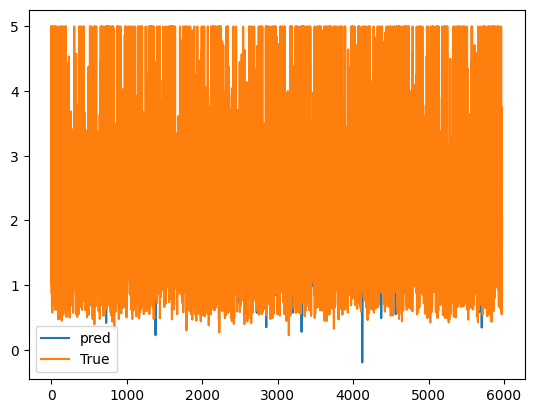

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse2)

1.1420601026629402


In [34]:
print(mse1)
print(mse2)

1.2705729000659036
1.1420601026629402


In [37]:
df_sp = df[['AveRooms','HouseAge','Population','AveBedrms','target']]

In [38]:
def saving_outlier(value):
    Q1 = df_sp['AveBedrms'].quantile(0.25)
    Q3 = df_sp['AveBedrms'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp['AveBedrms_sv'] = df_sp['AveBedrms'].apply(saving_outlier)

<ipython-input-38-38c84b0a671d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['AveBedrms_sv'] = df_sp['AveBedrms'].apply(saving_outlier)


In [39]:
df_sp.AveBedrms_sv.sum() #앞선 경우와 동일한 숫자가 나온 것을 알 수 있다.

724

In [ ]:
df_sp

,AveRooms,HouseAge,Population,target,AveRooms_sv
0,6.984127,41.0,322.0,4.526,0
1,6.238137,21.0,2401.0,3.585,0
2,8.288136,52.0,496.0,3.521,0
3,5.817352,52.0,558.0,3.413,0
4,6.281853,52.0,565.0,3.422,0
...,...,...,...,...,...
20635,5.045455,25.0,845.0,0.781,0
20636,6.114035,18.0,356.0,0.771,0
20637,5.205543,17.0,1007.0,0.923,0
20638,5.329513,18.0,741.0,0.847,0


In [40]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

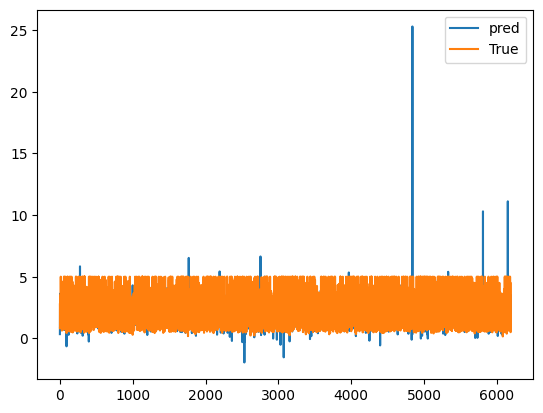

In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

1.267622045037421


In [43]:
print(mse1,'기존 base')
print(mse2,'outlier 제거')
print(mse3,'outlier saving')
#결과 자체는 outlier를 제거한 것이 좋게 나왔지만, 이것이 과연 올바른 방법인지에 대해선 추가적으로 생각해보아야 한다.

1.2705729000659036 기존 base
1.1420601026629402 outlier 제거
1.267622045037421 outlier saving


### 복습과제는 동일하게 다음 주까지 해주시면 됩니다.

### 필수과제 1
- 캘리포니아 데이터를 가지고 다른 변수들까지 추가해 보시면서 실제 outlier에 대한 값을 비교해 보고
- 본인이 선택한 변수에서 outlier 파생변수를 추가한 내용과
- outlier 제거에 대한 내용 비교 분석하시면 됩니다.

- 어떤 식으로 값이 변하는지 정리해 주시면 됩니다.
- 과제 기간은 시험기간 끝난 후 11월 첫 수업 전까지 제출하시면 됩니다. (필수과제는)